## PyCaret이라는 AutoML 패키지를 활용해보자

https://dacon.io/competitions/official/235647/codeshare/1701?page=1&dtype=recent&ptype=pub
https://pycaret.org/
https://pycaret.readthedocs.io/en/latest/api/classification.html
https://medium.com/@john_analyst/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
train = pd.read_csv('C:/dataset/dacon_7/train.csv', index_col='index')
test = pd.read_csv('C:/dataset/dacon_7/test_x.csv', index_col='index')
submission = pd.read_csv('C:/dataset/dacon_7/sample_submission.csv')

In [3]:
train.shape
test.shape
submission.shape

(45532, 77)

(11383, 76)

(11383, 1)

In [26]:
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [4]:
!pip install pycaret

.10.2-py2.py3-none-any.whl (18 kB)
  Using cached docker-4.3.1-py2.py3-none-any.whl (145 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached funcy-1.15-py2.py3-none-any.whl (32 kB)
Processing c:\users\conta\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870\smart_open-3.0.0-py3-none-any.whl
  Using cached Cython-0.29.14-cp37-cp37m-win_amd64.whl (1.7 MB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
Processing c:\users\conta\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655\htmlmin-0.1.12-py3-none-any.whl
  Using cached confuse-1.3.0-py2.py3-none-any.whl (64 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
  Using cached visions-0.5.0-py3-none-any.whl (64 kB)
Processing c:\users\conta\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe\imagehash-

In [5]:
from pycaret.classification import *

## 실험 환경 구축

In [6]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
clf = setup(data = train, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,2146
1,Target Type,Binary
2,Label Encoded,"1: 0, 2: 1"
3,Original Data,"(45532, 77)"
4,Missing Values,False
5,Numeric Features,41
6,Categorical Features,35
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 모델 학습

In [7]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6995,0.7751,0.6581,0.7601,0.7054,0.4020,0.4063
1,0.6810,0.7554,0.6546,0.7333,0.6917,0.3634,0.3659
2,0.6909,0.7652,0.6386,0.7582,0.6932,0.3864,0.3922
3,0.7010,0.7647,0.6707,0.7552,0.7104,0.4035,0.4066
4,0.7088,0.7880,0.6856,0.7587,0.7203,0.4183,0.4206
5,0.6934,0.7578,0.6517,0.7543,0.6993,0.3900,0.3944
6,0.6912,0.7689,0.6454,0.7545,0.6957,0.3862,0.3911
7,0.6834,0.7562,0.6489,0.7402,0.6915,0.3692,0.3726
8,0.6928,0.7581,0.6642,0.7460,0.7027,0.3872,0.3899
9,0.6922,0.7634,0.6475,0.7545,0.6969,0.3879,0.3926


In [8]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7039,0.7729,0.6477,0.7738,0.7052,0.4124,0.4190
1,0.6810,0.7519,0.6282,0.7480,0.6829,0.3668,0.3725
2,0.7041,0.7645,0.6403,0.7793,0.7030,0.4138,0.4218
3,0.6975,0.7654,0.6558,0.7585,0.7034,0.3981,0.4025
4,0.7057,0.7840,0.6667,0.7650,0.7124,0.4139,0.4180
5,0.6881,0.7579,0.6363,0.7549,0.6905,0.3808,0.3864
6,0.6985,0.7664,0.6386,0.7708,0.6985,0.4022,0.4093
7,0.6828,0.7540,0.6317,0.7490,0.6853,0.3701,0.3756
8,0.6909,0.7529,0.6464,0.7532,0.6957,0.3854,0.3901
9,0.6981,0.7636,0.6326,0.7739,0.6961,0.4022,0.4103


In [10]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6772,0.7476,0.6649,0.7226,0.6926,0.3541,0.3554
1,0.6760,0.7455,0.6667,0.7200,0.6923,0.3512,0.3523
2,0.6727,0.7427,0.6472,0.7249,0.6838,0.3469,0.3493
3,0.6890,0.7520,0.6896,0.7276,0.7081,0.3759,0.3766
4,0.6799,0.7594,0.6804,0.7192,0.6993,0.3578,0.3584
5,0.6774,0.7393,0.6592,0.7258,0.6909,0.3553,0.3571
6,0.6809,0.7536,0.6546,0.7333,0.6917,0.3632,0.3657
7,0.6605,0.7327,0.6426,0.7093,0.6743,0.3216,0.3233
8,0.6680,0.7359,0.6596,0.7119,0.6847,0.3353,0.3363
9,0.6856,0.7511,0.6579,0.7384,0.6958,0.3727,0.3754


## 모델 튜닝
모델을 하이퍼파라미터로 자동으로 튜닝시켜주는 기능

In [11]:
t_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7061,0.7779,0.6489,0.7768,0.7071,0.4169,0.4237
1,0.6860,0.7580,0.6431,0.7473,0.6913,0.3755,0.3799
2,0.6953,0.7658,0.6271,0.7730,0.6924,0.3970,0.4056
3,0.7032,0.7700,0.6581,0.7662,0.7080,0.4097,0.4146
4,0.7082,0.7865,0.6638,0.7708,0.7133,0.4195,0.4244
5,0.6897,0.7611,0.6305,0.7611,0.6897,0.3848,0.3916
6,0.6985,0.7690,0.6397,0.7700,0.6988,0.4020,0.4090
7,0.6900,0.7597,0.6340,0.7595,0.6911,0.3850,0.3913
8,0.6925,0.7571,0.6389,0.7602,0.6943,0.3896,0.3956
9,0.7038,0.7679,0.6458,0.7748,0.7044,0.4125,0.4193


In [12]:
t_gbc = tune_model(gbc)

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:08:41
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,Almost Finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


KeyboardInterrupt: 

In [ ]:
t_xgb = tune_model(xgb)

In [24]:
# 모델 저장
save_model(catboost, 'saved_catboost')
save_model(gbc, 'saved_gbc')
save_model(xgb, 'saved_xgb')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [ ]:
## 모델 로드
# saved_catboost = load_model('saved_catboost')
# saved_gbc = load_model('saved_gbc')
# saved_xgb = load_model('saved_xgb')

## 모델 앙상블

In [15]:
blended = blend_models(estimator_list = [catboost, gbc, xgb], fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6980,0.7663,0.6604,0.7565,0.7052,0.3986,0.4025
1,0.6979,0.7656,0.6592,0.7569,0.7047,0.3984,0.4024
2,0.6966,0.7696,0.6569,0.7563,0.7031,0.3960,0.4001
3,0.6867,0.7584,0.6476,0.7459,0.6933,0.3763,0.3803
4,0.6961,0.7564,0.6565,0.7556,0.7026,0.3950,0.3991
Mean,0.6951,0.7633,0.6561,0.7542,0.7018,0.3929,0.3969
SD,0.0042,0.0050,0.0045,0.0042,0.0043,0.0084,0.0084


## 모델 예측

In [16]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6939,0.7671,0.6506,0.7557,0.6992,0.3912,0.3957


In [ ]:
## AUC가 0.7671

## 전체 데이터에 대한 재학습
현재까지 실험은 주어진 train 데이터를 다시 한 번 train / validation으로 나눠서 실험을 한 것이므로, 전체 train 데이터에 학습되어 있지 않음. 최적의 성능을 위해 전체 데이터에 학습.

In [18]:
final_model = finalize_model(blended)

## 대회용 test set에 대한 예측

In [20]:
predictions = predict_model(final_model, data = test)
predictions

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Label,Score
0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,2550,...,0,0,1,0,1,0,1,1,2,0.6665
1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,1150,...,0,0,0,0,0,0,0,0,2,0.8762
2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,1326,...,0,1,1,0,1,0,1,1,2,0.5087
3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,2533,...,1,1,1,1,1,1,1,1,1,0.2041
4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,925,...,0,1,1,0,1,1,1,1,2,0.7387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,...,0,1,1,0,1,0,1,1,1,0.4385
11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,...,1,1,1,1,1,1,1,1,2,0.8716
11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,...,0,1,1,0,1,0,1,1,1,0.1963
11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,...,0,1,1,0,1,1,1,0,1,0.3077


In [21]:
submission['voted'] = predictions['Score']

In [22]:
submission

,voted
index,
0,0.6665
1,0.8762
2,0.5087
3,0.2041
4,0.7387
...,...
11378,0.4385
11379,0.8716
11380,0.1963


In [23]:
submission.to_csv('submission_proba.csv', index = False)

## Feature Importance

In [29]:
!pip install shap

In [30]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000026B01B9AA88>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


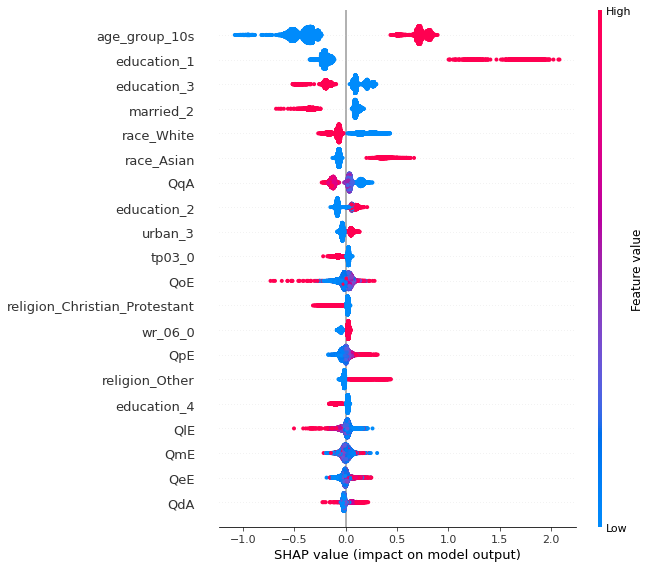

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [32]:
interpret_model(estimator = catboost)

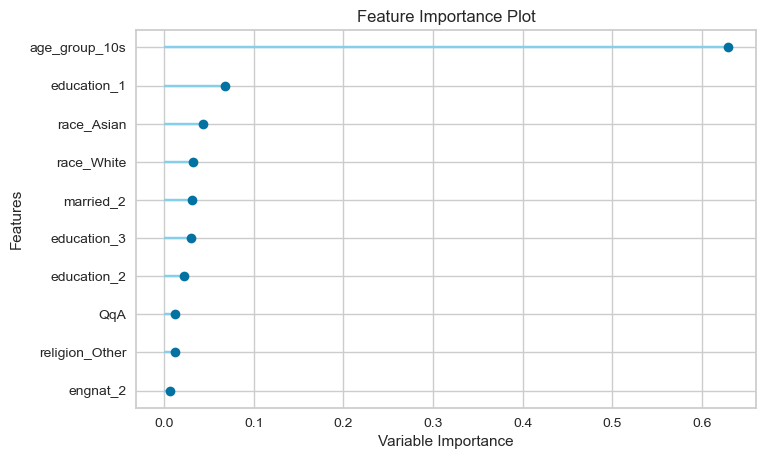

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [40]:
plot_model(gbc, plot='feature')

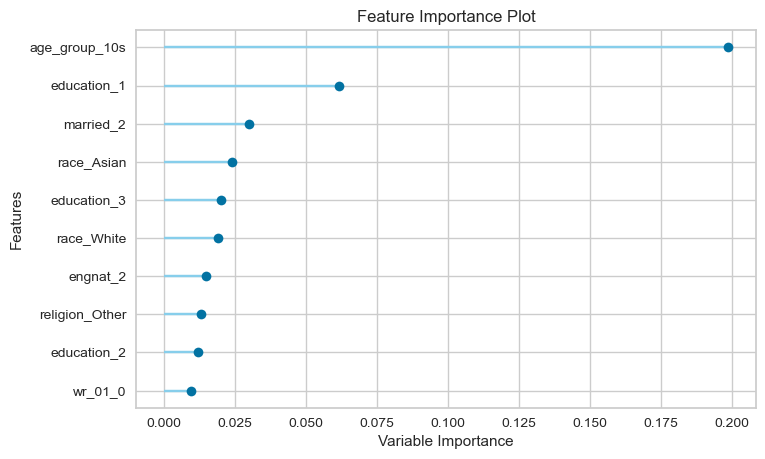

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(xgb, plot='feature')

In [ ]:
# 연령, 교육 수준, 결혼 여부, 인종, 모국어, 종교, Q_A, tp, wr(실존하는 해당 단어의 정의을 앎)
# 형제 자매 수, 성별, 필기하는 손, 유년기 거주 지역, wf(허구인 단어의 정의를 앎) 삭제

In [93]:
train2 = train.drop(['familysize', 'gender', 'hand', 'urban', 'wf_01', 'wf_02', 'wf_03'], axis=1, inplace=False)
test2 = test.drop(['familysize', 'gender', 'hand', 'urban', 'wf_01', 'wf_02', 'wf_03'], axis=1, inplace=False)

In [76]:
train.shape
train2.shape

(45532, 77)

(45532, 70)

In [94]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 70 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QaA        45532 non-null  float64
 1   QaE        45532 non-null  int64  
 2   QbA        45532 non-null  float64
 3   QbE        45532 non-null  int64  
 4   QcA        45532 non-null  float64
 5   QcE        45532 non-null  int64  
 6   QdA        45532 non-null  float64
 7   QdE        45532 non-null  int64  
 8   QeA        45532 non-null  float64
 9   QeE        45532 non-null  int64  
 10  QfA        45532 non-null  float64
 11  QfE        45532 non-null  int64  
 12  QgA        45532 non-null  float64
 13  QgE        45532 non-null  int64  
 14  QhA        45532 non-null  float64
 15  QhE        45532 non-null  int64  
 16  QiA        45532 non-null  float64
 17  QiE        45532 non-null  int64  
 18  QjA        45532 non-null  float64
 19  QjE        45532 non-null  int64  
 20  QkA   

## tp, wf에 대해 PCA

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
## tp

In [95]:
train2_tp = train2.iloc[:, 46:56].values
test2_tp = test2.iloc[:, 46:56].values

In [96]:
train2_tp = StandardScaler().fit_transform(train2_tp)
test2_tp = StandardScaler().fit_transform(test2_tp)

In [97]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(train2_tp)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1_tp', 'pca2_tp', 'pca3_tp'])

In [98]:
pca2 = PCA(n_components = 3)
principalComponents2 = pca2.fit_transform(test2_tp)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['pca1_tp', 'pca2_tp', 'pca3_tp'])

In [99]:
train2 = train2.drop(train2.columns[46:56], axis=1)
test2 = test2.drop(test2.columns[46:56], axis=1)

In [100]:
train2 = pd.concat([train2, principalDf], axis=1)
test2 = pd.concat([test2, principalDf2], axis=1)

In [101]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 63 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QaA        45532 non-null  float64
 1   QaE        45532 non-null  int64  
 2   QbA        45532 non-null  float64
 3   QbE        45532 non-null  int64  
 4   QcA        45532 non-null  float64
 5   QcE        45532 non-null  int64  
 6   QdA        45532 non-null  float64
 7   QdE        45532 non-null  int64  
 8   QeA        45532 non-null  float64
 9   QeE        45532 non-null  int64  
 10  QfA        45532 non-null  float64
 11  QfE        45532 non-null  int64  
 12  QgA        45532 non-null  float64
 13  QgE        45532 non-null  int64  
 14  QhA        45532 non-null  float64
 15  QhE        45532 non-null  int64  
 16  QiA        45532 non-null  float64
 17  QiE        45532 non-null  int64  
 18  QjA        45532 non-null  float64
 19  QjE        45532 non-null  int64  
 20  QkA   

In [ ]:
## wr

In [107]:
train2_wr = train2.iloc[:, 47:60].values
test2_wr = test2.iloc[:, 46:59].values

In [108]:
train2_wr = StandardScaler().fit_transform(train2_wr)
test2_wr = StandardScaler().fit_transform(test2_wr)

In [109]:
pca3 = PCA(n_components = 3)
principalComponents3 = pca3.fit_transform(train2_wr)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['pca1_wr', 'pca2_wr', 'pca3_wr'])

pca4 = PCA(n_components = 3)
principalComponents4 = pca4.fit_transform(test2_wr)
principalDf4 = pd.DataFrame(data = principalComponents4, columns = ['pca1_wr', 'pca2_wr', 'pca3_wr'])

In [110]:
train2 = train2.drop(train2.columns[47:60], axis=1)
test2 = test2.drop(test2.columns[46:59], axis=1)

train2 = pd.concat([train2, principalDf3], axis=1)
test2 = pd.concat([test2, principalDf4], axis=1)

In [111]:
train2

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,married,race,religion,voted,pca1_tp,pca2_tp,pca3_tp,pca1_wr,pca2_wr,pca3_wr
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,3,White,Other,2,1.634180,0.426580,1.604148,0.955816,-1.839992,-1.607056
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,Asian,Hindu,2,-0.473938,0.051921,0.289800,0.062910,-1.661020,-0.272469
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,2,White,Other,1,-1.214174,0.864369,0.613615,-0.800038,-0.007027,0.041226
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,1,Asian,Hindu,1,-0.419234,-0.177526,-1.053613,3.531831,-1.108189,-2.120998
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,2,White,Agnostic,1,-2.058684,-0.324416,0.100642,-1.176347,0.570812,0.439056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,White,Jewish,2,2.292691,-3.252183,0.816989,-0.800038,-0.007027,0.041226
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,White,Atheist,2,-0.553148,-0.207403,0.718100,-1.086164,1.152326,-0.572671
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,White,Christian_Other,1,-0.632107,0.060285,-1.274098,-0.527973,-1.163572,0.746975
45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,...,1,White,Atheist,1,-0.686493,-0.045512,0.411020,-0.800038,-0.007027,0.041226


## 실험 환경 구축

In [114]:
clf2 = setup(data = train2, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,4855
1,Target Type,Binary
2,Label Encoded,"1: 0, 2: 1"
3,Original Data,"(45532, 53)"
4,Missing Values,False
5,Numeric Features,46
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='voted',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Leve...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
     

## 모델 학습 및 비교

In [115]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6940,0.7635,0.6410,0.7619,0.6961,0.3925,0.3986,44.9698
1,Light Gradient Boosting Machine,0.6943,0.7632,0.6430,0.7611,0.6969,0.3929,0.3987,2.2451
2,CatBoost Classifier,0.6910,0.7619,0.6532,0.7497,0.6981,0.3848,0.3887,35.2594
3,Linear Discriminant Analysis,0.6907,0.7600,0.6566,0.7473,0.6989,0.3836,0.3871,0.8438
4,Extra Trees Classifier,0.6916,0.7580,0.6402,0.7584,0.6942,0.3877,0.3935,4.0667
5,Ada Boost Classifier,0.6873,0.7543,0.6487,0.7464,0.6941,0.3774,0.3814,10.2755
6,Extreme Gradient Boosting,0.6759,0.7442,0.6617,0.7224,0.6906,0.3517,0.3533,7.1832
7,Quadratic Discriminant Analysis,0.6045,0.7254,0.3517,0.8299,0.4873,0.2472,0.3095,0.2604
8,Random Forest Classifier,0.6597,0.7168,0.6033,0.7278,0.6597,0.3253,0.3311,0.7712
9,Decision Tree Classifier,0.6087,0.6053,0.6416,0.6423,0.6420,0.2105,0.2106,3.2466


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4855, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, 

In [116]:
best_3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=4855, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

## 모델 앙상블

In [117]:
blended2 = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6927,0.7591,0.6437,0.7579,0.6961,0.3895,0.3948
1,0.6999,0.7783,0.6360,0.7749,0.6986,0.4055,0.4134
2,0.6963,0.7647,0.6407,0.7655,0.6976,0.3973,0.4037
3,0.6922,0.7623,0.6557,0.7499,0.6996,0.3869,0.3906
4,0.6939,0.7653,0.6466,0.7582,0.6979,0.3917,0.3968
Mean,0.6950,0.7659,0.6445,0.7613,0.6980,0.3942,0.3998
SD,0.0028,0.0065,0.0066,0.0084,0.0012,0.0066,0.0080


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:VotingClassifier(estimators=[('Gradient Boosting Classifier_0',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min

## 모델 예측

In [118]:
pred_holdout2 = predict_model(blended2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6937,0.7662,0.639,0.7625,0.6953,0.3922,0.3984


## 전체 데이터에 대한 재학습

In [119]:
final_model2 = finalize_model(blended2)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=VotingClassifier(estimators=[('Gradient Boosting Classifier_0',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                         

## 대회용 test set에 대한 예측

In [120]:
predictions2 = predict_model(final_model2, data = test2)

In [121]:
submission['voted'] = predictions2['Score']

In [122]:
submission.to_csv('submission_proba2.csv', index = False)